In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

sns.set_theme(style="whitegrid")

<h2>Lets make a request to the chats endpoint to gather all the data </h2>

In [224]:
url = "https://ironhack-nlp.herokuapp.com/"
chats = "api/chats"
res = requests.get(url+chats).json()

In [225]:
chats = pd.DataFrame(res)
chats.drop(columns=['id', 'user_id'], inplace=True)
chats.head()

,message,sentiment,created_at,name,sex,age
0,>:(,-0.5719,2021-05-03 14:45:41,javi,M,24
1,:(,-0.4404,2021-05-03 14:45:22,javi,M,24
2,:/,-0.3400,2021-05-03 14:45:17,javi,M,24
3,"No me gusta nada, soy una persona muy negativa",-0.2960,2021-05-03 14:45:05,javi,M,24
4,hola me llamo javier y no se como postear toda...,0.0000,2021-05-03 14:44:43,javi,M,24


In [226]:
chats.describe()

,sentiment,age
count,31.000000,31.000000
mean,0.057081,27.354839
std,0.378781,7.859382
min,-0.599400,18.000000
25%,-0.148000,18.000000
50%,0.000000,24.000000
75%,0.440400,37.000000
max,0.636000,37.000000


<h2>Ranking of the average sentiment of every users chats</h2>

In [227]:
avg=chats.groupby("name").sentiment.mean().sort_values(ascending=False)
avg_df = pd.DataFrame(data=avg)
avg_df

,sentiment
name,
Unaiat,0.440400
Fran,0.260011
Ana,0.174633
Bill Gates,0.012600
Fer,0.000000
Ras,0.000000
javier cabrera,0.000000
javi,-0.329660


<h2>Quick breakdown of the number of messages destructured by Sex</h2>

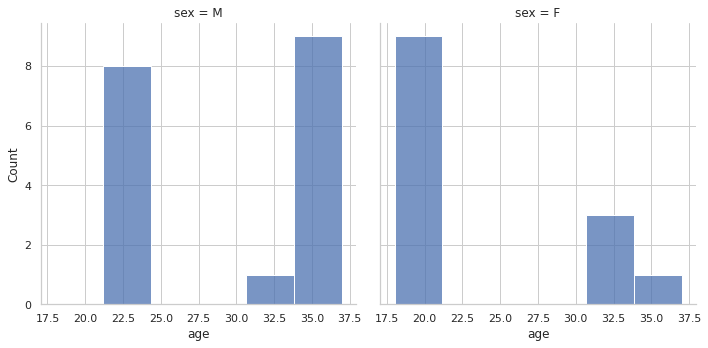

In [228]:
sns.displot(
    chats, x="age", col="sex",
    facet_kws=dict(margin_titles=True),
)

<h2>Distribution of Sentiment among all the users</h2>

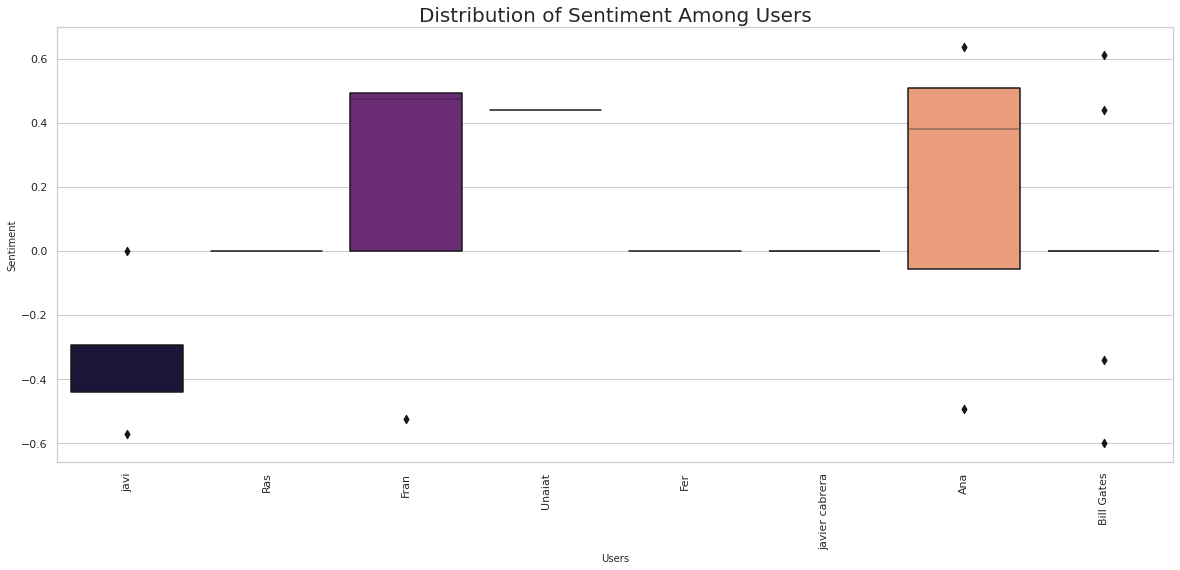

In [229]:
plt.rcParams['figure.figsize'] = (20, 8)
ax = sns.boxenplot(x = 'name', y = 'sentiment', data = chats, palette = 'magma')
ax.set_xlabel(xlabel = 'Users', fontsize = 10)
ax.set_ylabel(ylabel = 'Sentiment', fontsize = 10)
ax.set_title(label = 'Distribution of Sentiment Among Users', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

<h2>KDE Plot of Sentiment / Age by user sex</h2>

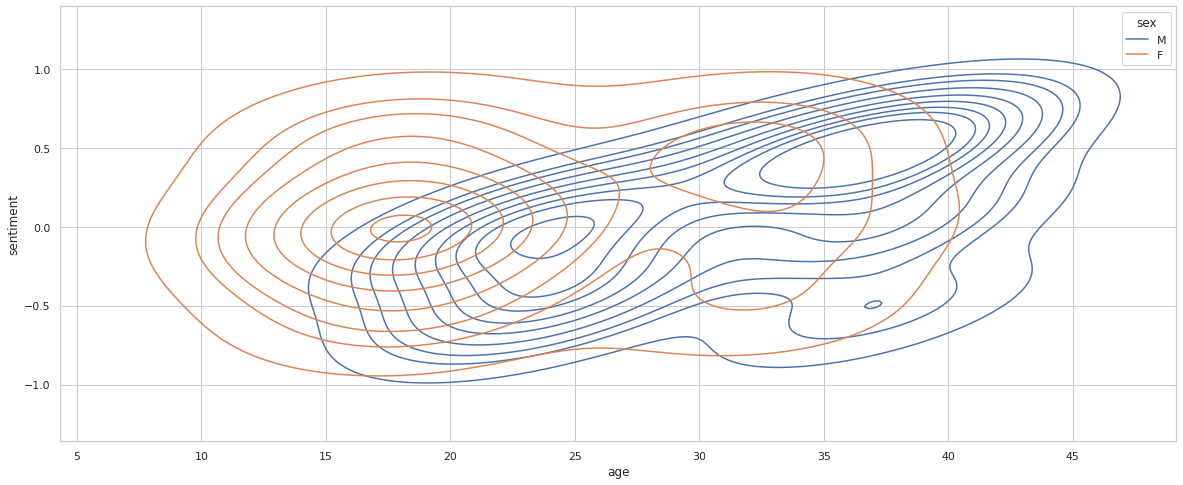

In [230]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.kdeplot(
    data=chats,
    y="sentiment",
    x="age",
    hue="sex"
)
fig.savefig("images/sentikde.png")

<h2>CountPlot of messages by their sentiment</h2>

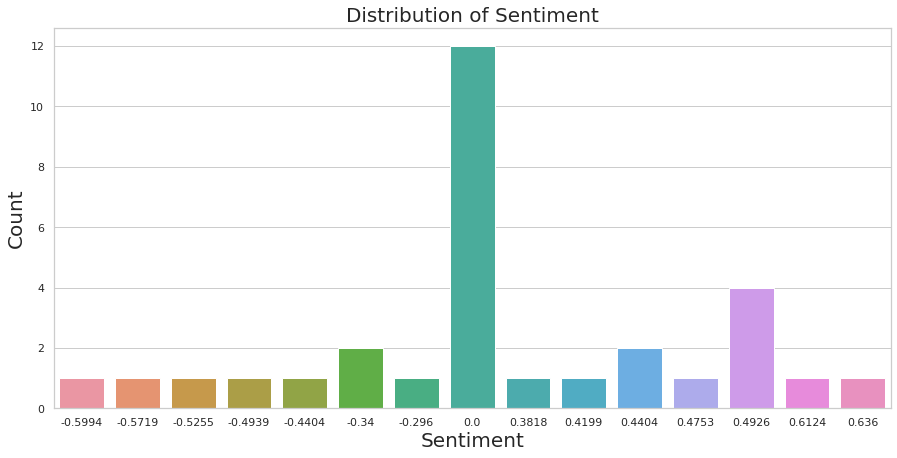

In [231]:
plt.figure(figsize = (15, 7))
ax = sns.countplot(x = 'sentiment', data = chats)
ax.set_title(label = 'Distribution of Sentiment', fontsize = 20)
ax.set_xlabel(xlabel = 'Sentiment', fontsize = 20)
ax.set_ylabel(ylabel = 'Count', fontsize = 20)
plt.show()

<h2>Average Sentiment of every user in the chat</h2>

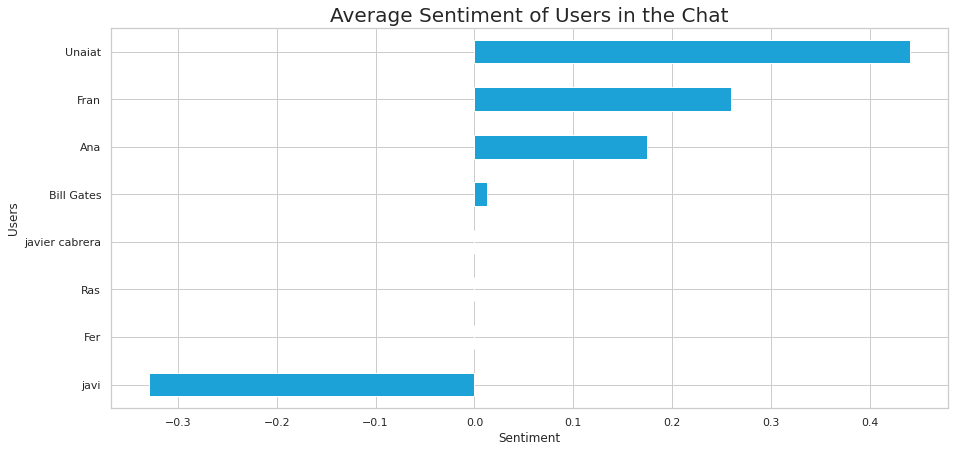

In [232]:
chats.groupby("name").sentiment.mean().sort_values().plot.barh(color="#1da2d8", figsize = (15, 7))
plt.title('Average Sentiment of Users in the Chat', fontsize = 20, fontweight = 14)
plt.xlabel('Sentiment')
plt.ylabel('Users')
plt.show()